# Fitting models to Data

Please ensure you have watched the Chapter 8 video(s).

## You will learn the following things in this Chapter


- How to use Python programming to do the above.
- After completing this notebook you will be able to start CA 2.

***

# Fitting straight line models to data - linear regression

To fit a straight line to the data we want to express the fit as a linear relation in the form of $y = A + Bx$ where $A$ is the y-intercept and $B$ is the gradient ie the true value of $y_i$ is given by 

$y_i = A+Bx_i$


**Homoscedastic errors**

So now we need to assume that the errors associated with $x$ are also normally distributed. Consequently, we can express the probability of obtaining a measurement of $y_i$ as:

$p_{A,B}(y_i) \propto \dfrac{1}{\sigma_y} {\rm exp}\left( -\dfrac{(y_i-A-Bx_i)^2}{2\sigma_y^2}   \right)$

If each $y_i$ at each $x_i$ is drawn randomly, the probability of getting the entire observed data set is

$p_{A,B}(y_1,y_2,...y_N)\propto \dfrac{1}{\sigma_y^N} {\rm exp}\left( -\dfrac{\chi^2}{2}   \right)$

We are trying to maximise the probability of the observed data set then the exponential term must be minimised so $\chi^2$ (chi-squared) will equal zero. The equation for chi-squared is 

$\chi^2 = \sum^N_{i=1} \dfrac{(y_i-A-Bx_i)^2}{\sigma_y^2}$

Need to differentiate the above equation and set equal to zero:

$ \dfrac{\partial \chi^2 }{\partial A} = \dfrac{-2}{\sigma_y^2} \sum^N_{i=1} (y_i -A-Bx_i) = 0$

$ \dfrac{\partial \chi^2 }{\partial B} = \dfrac{-2}{\sigma_y^2}x_i \sum^N_{i=1} (y_i -A-Bx_i) = 0$

These can be solved and result in the following set of equations (for homoscedastic case) for the best fit parameters are (these are given in the lecture notes)

$A = \dfrac{\sum x^2 \sum y - \sum x \sum xy} {N\sum x^2 - (\sum x)^2}$

$B = \dfrac{N \sum xy - \sum x \sum y} {N\sum x^2 - (\sum x)^2}$

We can derive these by minimising the chi-squared and maximise of probability of getting the data set observed.

We know that $y_i$ are distributed about some true value with spread $\sigma_y$ but the equations for $A$ and $B$ don't actually depend on this!  But we can estimate the value of $\sigma_y$ given that true values of $y_i$ should depend on $A$ and $B$. 

For errors in $A$ and $B$ we need to use the standard deviation of the $y$ data:

$\sigma_y = \sqrt{ \dfrac{1}{N} \sum^N_{i-1} (y_i - A-Bx_i)^2 }$

Error propogation results in the following equations for $A$ and $B$:

$\sigma_A = \sigma_y   \sqrt{ \dfrac{\sum x^2}{N\sum x^2 - (\sum x)^2}  }$

$\sigma_B = \sigma_y   \sqrt{ \dfrac{N}{N\sum x^2 - (\sum x)^2}  }$


**Heteroscedastic errors with a linear fit**

Weight the probabilities by the errors where $w = 1/\sigma^2$

$A = \dfrac{\sum wx^2 \sum wy - \sum wx \sum wxy }{\sum w \sum wx^2 - (\sum wx)^2}$

$B = \dfrac{\sum w \sum wxy - \sum wx \sum wy }{\sum w \sum wx^2 - (\sum wx)^2}$

### <font color=#4290C4>Example</font>

Netflix managers poll their subscribers to see how the fraction of users that watched She-Ra in October 2019 $x$ compares with the age of the viewer $y$ before they decide to commission a new series of the show. This data is available at this [link](https://github.com/haleygomez/Data-Analysis-2021/blob/master/blended_exercises/Chapter%208/DataAnalysis_datafile1.dat) and is called DataAnalysis_datafile1.dat. 

1. Write functions from scratch to fit a straight line to the data quoting all the fit parameters and their errors.  

2. Comment on the goodness of the fit and the uncertainties.

###  <font color=#c38241> Solution</font>

Click below to see the solution.

This questions involves fitting a straight line to set of points with homoscedastic errors on $y$. 

Since the errors are homoscedastic, the scatter around the line should be notably larger than the $\sigma = 1.6$ that one might expect. 

Let's open the datafile and take a look

('x', 'y', 'sigma_y_estimate')


Text(0, 0.5, 'y')

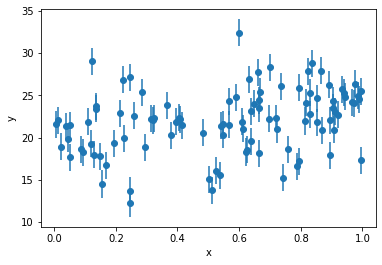

In [25]:
import numpy as np
data = np.genfromtxt('DataAnalysis_datafile_1.dat',names=True)

# print out the columns to see what's in the file
print(data.dtype.names)

import numpy as np
import pylab as plt 

%matplotlib inline  

data = np.genfromtxt('DataAnalysis_datafile_1.dat',names=True)

plt.errorbar(data['x'],data['y'],yerr=data['sigma_y_estimate'],fmt='o')
plt.xlabel('x')
plt.ylabel('y')

The scatter in the data is clearly much larger than the errors in $y$ quoted!  Note though, to orthogonalise the model we need to either use the above equations and **quote the covariance** or use:

$y = A+B(x_i-\hat{x})$

throughout, where $\hat{x}$ is the mean.  Here we will show the 1st option.

The errors are homoscedastic since the errors on y are all the same.

In [30]:
# functions to estimate A and B based on notes and equations above
def best_fit_a(x,y,N):
    result = (np.sum(x**2.)*np.sum(y) - np.sum(x)*np.sum(x*y))/ ((N*np.sum(x**2.)) - (np.sum(x))**2. )
    return result

def best_fit_b(x,y,N):
    result = ((N*np.sum(x*y))- (np.sum(x)*np.sum(y))) / ((N*np.sum(x**2.)) - (np.sum(x))**2. )
    return result

A = best_fit_a(data['x'],data['y'],len(data['x']))
B = best_fit_b(data['x'],data['y'],len(data['x']))

print('Best fit line equation paramaters: A = {:.2f} age in years'.format(A),'and B= {:.2f} age in years/fraction'.format(B))

Best fit line equation paramaters: A = 19.76 age in years and B= 3.97 age in years/fraction


Text(0, 0.5, 'y')

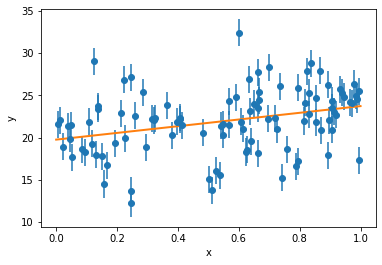

In [31]:
# to plot the straightline
def straightline(a,b,x):
    result = a + b*(x)
    return result

x = np.linspace(0,1,100)
fit = straightline(A,B,x)

plt.errorbar(data['x'],data['y'],yerr=data['sigma_y_estimate'],fmt='o')
plt.plot(x,fit,lw=2)
plt.xlabel('x')
plt.ylabel('y')

For errors in $A$ and $B$ we need to use the standard deviation of the $y$ data:

$\sigma_y = \sqrt{ \dfrac{1}{N} \sum^N_{i-1} (y_i - A-Bx_i)^2 }$

where here $N$ is the *number of degrees of freedom* ie in this case $N={\rm number~of~data~ points}-2$. The $N-2$ appears because we already need to know $A$ and $B$ to work out $\sigma_y$.

We need to do this because the errors on the fit depends not just on the error bars in $y$ but also on the fit itself, and by using the above equation we can estimate the true error in $y$ (which should be larger than then 1.6 errors given to the students for each datapoint).  

In [32]:
# let's estimate sigma_y using our A+B values

def sigma(N,A,B,x,y):
    sigma = np.sqrt( (1./(N-2))* np.sum((y - A - B*x)**2.0)  )
    return sigma

N=len(data['x'])
x= data['x']
y= data['y']

sigma_y = sigma(N,A,B,x,y)

print('The error in y (sigma_y) from our best fit line is {:.2f}.'.format(sigma_y))

The error in y (sigma_y) from our best fit line is 3.61.


Thus the $\sigma_y$ of the data is much larger than the 1.6 on each data point quoted in the original data file. 

Calculating $\sigma_A$ and $\sigma_B$:

In [33]:
def error_in_a(x,sig_y,N):
    result = sig_y* np.sqrt( np.sum(x**2.) / ((N*np.sum(x**2.)) - (np.sum(x))**2.  )  )
    return result

def error_in_b(x,sig_y,N):
    result = sig_y* np.sqrt( N / ((N*np.sum(x**2.)) - (np.sum(x))**2.  )  )
    return result

error_A = error_in_a(data['x'],sigma_y,len(data['x']))
error_B = error_in_b(data['x'],sigma_y,len(data['x']))

print('A is {:.2f} age in years'.format(A),'with error {:.2f}'.format(error_A))
print('B is {:.2f} age in years/per fraction'.format(B),'with error {:.2f}'.format(error_B))

A is 19.76 age in years with error 0.75
B is 3.97 age in years/per fraction with error 1.19


Looking at the plot, it does not look like a good fit - indeed the straight line does not pass though many of the error bars on the data points. This suggests that either there are unaccounted sources of error or that the data is poorly modelled with a straight-line.

What's the quality of the fit? We can use the equation from the notes for reduced $\chi^2$ 

$\bar{\chi}^2 = \dfrac{ \chi^2 }{ N}$

where $N$ is the number of degrees of freedom = $N_{\rm data} - N_{\rm params}$ which in this case is $100-2$ since we need $A$ and $B$ (which are not independent) and $\sigma_y$ to determine $\chi^2$. We would expect reduced $\chi^2$ to equal close to 1 to denote a good fit.

In [34]:
def eqn(a,b,z):
    return a + b*z

def chi_sq(y,x,sig_y,a,b):
    result = np.sum(  (y - a-b*data['x'])**2. /sig_y**2. )
    return result

sig_y = 1.6 # quoted as error in the data
red_chi_sq  = chi_sq(data['y'],data['x'],sig_y,A,B)  / (len(data['x']) - 1) # need to calculate A+B

print('reduced chi-squared for sigma_y from data is {:.3f} +/- {:.3f}'.\
      format(red_chi_sq,np.sqrt(2/len(data['x']))))

#but real sig_y  =3.61
sig_y = 3.61 # quoted as error in the data
red_chi_sq  = chi_sq(data['y'],data['x'],sig_y,A,B)  / (len(data['x']) - 1) 
# need to calculate A+B

print('reduced chi-squared for sigma_y=3.61 is {:.3f} +/- {:.3f}'.\
      format(red_chi_sq,np.sqrt(2/len(data['x']))))


reduced chi-squared for sigma_y from data is 5.026 +/- 0.141
reduced chi-squared for sigma_y=3.61 is 0.987 +/- 0.141


So this is not a good fit if we take the error in $y$ from the original data, but the fit vs model is better when accounting for the larger error in $y$ compared to the true fit $\sigma_y$. But this is simply because the error is so large the model can be seen as an ok fit

One can also try the Spearman rank correlation to see if a straight line fit is appropriate:

In [35]:
from scipy.stats import rankdata
# let's rank the data
r_x = rankdata(data['x'])
r_y = rankdata(data['y'])

# need to set up equation in notes
def rho_s(rank_x,rank_y,N):
    top = np.sum(rank_x*rank_y) - (N*(N+1)**2./4)
    bottom_1 = np.sqrt( np.sum(rank_x**2.) - (N*(N+1)**2./4)   )  
    bottom_2 = np.sqrt( np.sum(rank_y**2.) - (N*(N+1)**2./4)   )
    rho = top / (bottom_1*bottom_2)
    return rho

spearman = rho_s(r_x,r_y,len(data['x']))

print('the Spearman rank statistic is {:.2f}'.format(spearman))

the Spearman rank statistic is 0.37


Thus a linear relationship between the two does not make a good model for this data since the Spearman rank statistic is less than 0.6.   As the model chosen to fit the data is flawed the error on the fit parameters found from the equations above are in fact too small and does not accurately reflect the uncertainty in the $A$ and $B$ values given the quality of the fit. 

We did all of the above by hand to make sure we could work through the mathematics, but we can also simply use Python to make things easier and quicker.  For example, we could fit a straight line using the functions `poly1d` or `curve_fit`. 

Fit parameters A and B are 19.764 and 3.967

covariance matrix [[ 0.10966227 -0.15270869]
 [-0.15270869  0.27741274]]


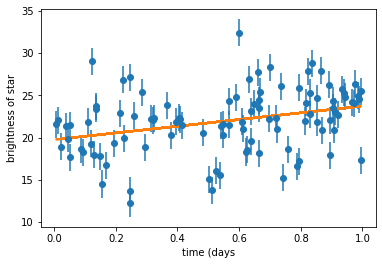

In [66]:
# this is a function that we think may explain the data
def straightline_func(x,a,b):
    return a + b*x

data['x'],data['y']

params, params_covariance = optimize.curve_fit(straightline_func, data['x'],data['y'],\
                                               sigma=data['sigma_y_estimate'],absolute_sigma=True)

print('Fit parameters A and B are {:.3f} and {:.3f}'.format(params[0],params[1]))
print()
print('covariance matrix',params_covariance)

# plot the data
plt.errorbar(data['x'],data['y'],yerr=data['sigma_y_estimate'],fmt='o',label='data')
plt.xlabel('time (days')
plt.ylabel('brightness of star')

# plot the fit
plt.plot(data['x'],straightline_func(data['x'],params[0],params[1]),lw=2,label='best fit')

In [70]:
# by hand
print('Best fit line equation paramaters by hand: A = {:.2f} age in years'.format(A),\
          'and B= {:.2f} age in years/fraction'.format(B))

# using Python's curve fit

print('Best fit line equation paramaters using functions: A = {:.2f} age in years'.format(params[0]),'and B= {:.2f} age in years/fraction'.format(params[1]))



Best fit line equation paramaters by hand: A = 19.76 age in years and B= 3.97 age in years/fraction
Best fit line equation paramaters using functions: A = 19.76 age in years and B= 3.97 age in years/fraction


***

## Monte Carlo Fitting

Suppose we have good reason to think that nature generates values of some physical quantity  $y$  in a way that depends on some other physical quantity  $x$, in the manner of some model, let's say: $y(x)=Ax+B$
 
We would like to find out the values $y$ and ranges of $A$ and $B$ by taking a number of measurements of $y(x)$ to trace the relationship. Suppose also that there is some uncertainty in each of the measurements. 

To explore how our measurements might behave, we can simulate a large number of hypothetical experiments by using Monte Carlo methods and assess the range of parameters returned from these simulated or "fake" experiments.

We can approach this by simulating how much each measured $y_i$ we've generated, deviates from the "true" value $g_i$ which our model (in the example above, the straight line) predicts.

### <font color=#4290C4>Example</font>

Use the Monte Carlo method to generate random data from the Netflix data in DataAnalysis_datafile1.dat, and derive new (straight line) fit parameters $A$ and $B$ from this.

###  <font color=#c38241> Solution</font>

Click below to see the solution.

Best fit line equation paramaters from earlier: A = 19.76 age in years and B= 3.97 age in years/fraction
Best fit line equation paramaters from MC: A = 19.75 age in years and B= 3.97 age in years/fraction


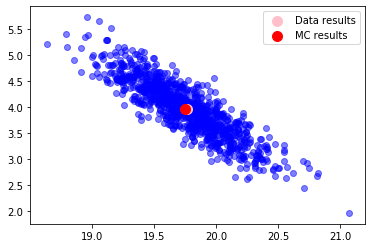

In [36]:
# generate n sets of data from the datafile by adding gaussian noise within error
n_sample = 1000 
n = len(data['x'])

new_y =np.zeros([n,n_sample])
new_x =np.zeros([n,n_sample])

for i in range(n_sample):
    new_y[:,i] = np.random.normal(data['y'],data['sigma_y_estimate']) 
    new_x[:,i] =  data['x']
    
A_mc = np.zeros(n_sample)
B_mc = np.zeros(n_sample)

# fit a line to each set of data
for j in range(n_sample):
    A_mc[j] = best_fit_a(new_x[:,j],new_y[:,j],n)
    B_mc[j] = best_fit_b(new_x[:,j],new_y[:,j],n)  

# get average values of A and B from all the samples
mean_A_mc = np.mean(A_mc)
mean_B_mc = np.mean(B_mc)

print('Best fit line equation paramaters from earlier: A = {:.2f} age in years'.format(A),\
          'and B= {:.2f} age in years/fraction'.format(B))
print('Best fit line equation paramaters from MC: A = {:.2f} age in years'.format(mean_A_mc),\
          'and B= {:.2f} age in years/fraction'.format(mean_B_mc))

plt.scatter(A_mc,B_mc,marker='o',c='blue',alpha=0.5)
plt.scatter(A,B,c='pink',label = 'Data results',s=100)
plt.scatter(mean_A_mc,mean_B_mc,c='magenta',label = 'MC results',s=100)
plt.legend()

The best fit values from the straight line fit to the original data and the straight line fit to the MC data are rather similar.   But the great thing about the MC is that we can use the standard deviation to derive an uncertainty in $A$ and $B$.



In [49]:


mean_A_mc_err = np.std(A_mc,ddof=1)
mean_B_mc_err = np.std(A_mc,ddof=1)

print('Best fit line equation paramaters from original data: A = {:.2f} +/- {:.2f} age in years'.format(A,error_A),\
          'and B= {:.2f} +/- {:.2f} age in years/fraction'.format(B,error_B))
print()
print()
print('Best fit line equation paramaters from MC: A = {:.2f} +/- {:.2f} age in years'.format(mean_A_mc,mean_A_mc_err),\
          'and B= {:.2f} +/- {:.2f} age in years/fraction'.format(mean_B_mc,mean_B_mc_err))

Best fit line equation paramaters from original data: A = 19.76 +/- 0.75 age in years and B= 3.97 +/- 1.19 age in years/fraction


Best fit line equation paramaters from MC: A = 19.75 +/- 0.34 age in years and B= 3.97 +/- 0.34 age in years/fraction


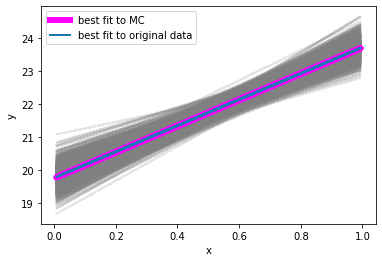

In [50]:
# let's plot all our best fit lines to take a look at them
for i in range(n_sample):
    fit_new = straightline(A_mc[i],B_mc[i],x)
    plt.plot(x,fit_new,c='grey',alpha=0.2)
    
# straight line fit from mean A and B from MC analysis
fit_mc = straightline(mean_A_mc,mean_B_mc,x)
fit_data = straightline(A,B,x)
# straight line fit from original data

plt.plot(x,fit_mc,lw=6,c='magenta',label='best fit to MC')
plt.plot(x,fit_data,lw=2,label='best fit to original data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Fitting curves to data 

An easy way to fit curves is via `the scipy` `optimize.curve_fit`. This returns an array with the best fitting parameters for the function it is given, based on minimising the differences in the `func(x,fit parameters)-y` squared.

It also returns an array with the covariance of the fit parameters (see Chapter 4). The diagonals of this array also provides the variance of the parameter estimates.

### <font color=#4290C4>Example</font>

1. Generate some fake data and fit a curve to it using the `scipy` `optimize curvefit` function and an equation of the form $y = A {\rm sin}(bx)+C$. Perturb each $y$ value by adding on some $\Delta y$ to create new "noisy" data.   Obtain errors in $y$ using a random normal distribution with normalisation of 20% of $y$.

2. Derive the reduced chi-square value for your fit.

###  <font color=#c38241> Solution</font>

Click below to see the solution.

<ErrorbarContainer object of 3 artists>

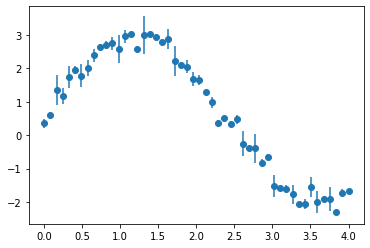

In [22]:
from scipy import optimize
import numpy as np
import pylab as plt 
%matplotlib inline  

# this is a function that we think may explain the data
def test_func(x, a,b,c):
    return a * np.sin(b * x)+c

# generate some fake data
# start off with x array
xdata = np.linspace(0, 4, 50)
# get y from the function above
y = test_func(xdata, 2.5, 1.3, 0.5)

# initialise the random_seed for reproducability
# ie we will get the same initial random seed every time
np.random.seed(1729)
# perturb y by this noise
y_noise = 0.2*np.random.normal(size=xdata.size)
# make new y array that is noisy
ydata = y + y_noise

# set up y error 
y_sigma = 0.2*(0.5+np.random.normal(size=xdata.size))

# plot the data
plt.errorbar(xdata, ydata,yerr=y_sigma,fmt='o',label='data')

Fit parameters A, B and C are 2.485, 1.319 and 0.430

covariance matrix [[ 1.23722500e-04  1.45537330e-05  1.29967869e-05]
 [ 1.45537330e-05  4.12609818e-06 -1.42942807e-08]
 [ 1.29967869e-05 -1.42942807e-08  4.46367627e-05]]


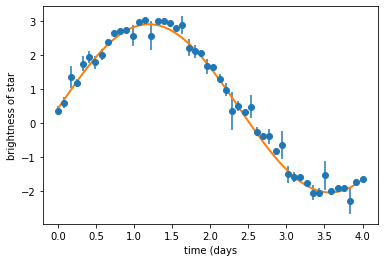

In [23]:
# get scipy to do the fitting for us
# need to include y errors
params, params_covariance = optimize.curve_fit(test_func, xdata, ydata,sigma=y_sigma,absolute_sigma=True)
print('Fit parameters A, B and C are {:.3f}, {:.3f} and {:.3f}'.format(params[0],params[1],params[2]))
print()
print('covariance matrix',params_covariance)

# plot the data
plt.errorbar(xdata, ydata,yerr=y_noise,fmt='o',label='data')
plt.xlabel('time (days')
plt.ylabel('brightness of star')

# plot the fit
plt.plot(xdata,test_func(xdata,params[0],params[1],params[2]),lw=2,label='best fit')

In [24]:
import scipy.stats
# equation to get reduced chi^2
def chi_sq_red(x,y,y_error):
    # number of degrees of freedom
    n = len(x) - 3 #3 parameters already need to be calculated : a, b + c
    result = (1./n)*np.sum(((y-test_func(x,params[0],params[1],params[2]))/y_error)**2.0) 
    return result

# calculate chi^2 of the fit:
print('The reduced chi-squared for the fit is {:.3f}'.format(chi_sq_red(xdata,ydata,y_sigma))) 


The reduced chi-squared for the fit is 6.133


***

Now you are ready to tackle the **Chapter 8 quiz** on Learning Central and the [Chapter 8 yourturn notebook](https://github.com/haleygomez/Data-Analysis-2021/blob/master/blended_exercises/Chapter%208/Chapter8_yourturn.ipynb).